<a href="https://colab.research.google.com/github/amin20033/CognoRise-InfoTech/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Impoting all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Reading the dataset
df=pd.read_csv("/content/sample_data/winequality-red.csv")
#Displaying Top 5 data
print(df.head().to_string())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5


In [46]:
#Checking if there are any missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [47]:
#Gives the descriptive statistics on the dataset
print(df.describe().to_string())


       fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.538806     0.087467            15.874922             46.467792     0.996747     3.311113     0.658149    10.422983     5.636023
std         1.741096          0.179060     0.194801        1.409928     0.047065            10.460157             32.895324     0.001887     0.154386     0.169507     1.065668     0.807569
min         4.600000          0.120000     0.000000        0.900000     0.012000             1.000000              6.000000     0.990070     2.740000     0.330000     8.400000     3.000000
25%         7.100000          0.390000     0.090000    

In [48]:
#Displays the mean values of individual quality of wine in the
print(df.groupby("quality").mean().to_string())

         fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates    alcohol
quality                                                                                                                                                              
3             8.360000          0.884500     0.171000        2.635000   0.122500            11.000000             24.900000  0.997464  3.398000   0.570000   9.955000
4             7.779245          0.693962     0.174151        2.694340   0.090679            12.264151             36.245283  0.996542  3.381509   0.596415  10.265094
5             8.167254          0.577041     0.243686        2.528855   0.092736            16.983847             56.513950  0.997104  3.304949   0.620969   9.899706
6             8.347179          0.497484     0.273824        2.477194   0.084956            15.711599             40.869906  0.996615  3.318072   0.675329  10.629519
7   

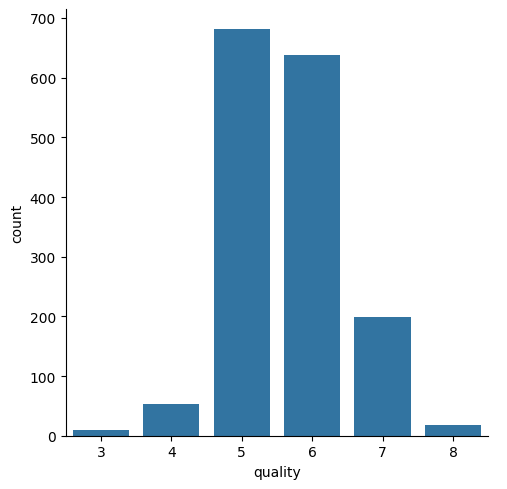

In [49]:
#Barchart for quality
sns.catplot(x="quality",data=df,kind="count")
plt.show()


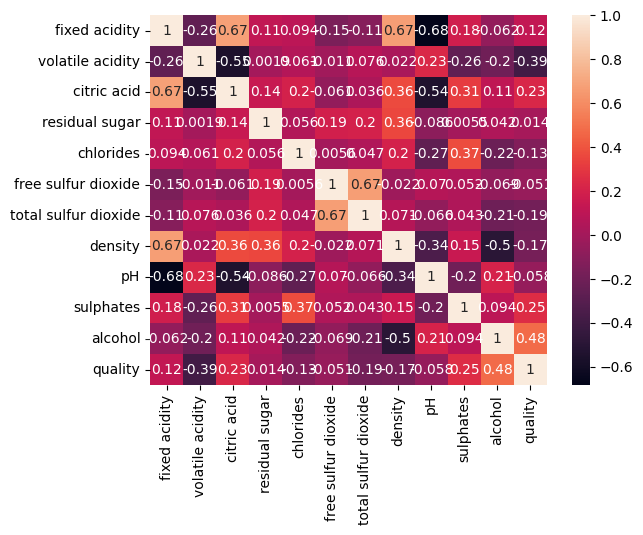

In [50]:
#Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()


<Axes: >

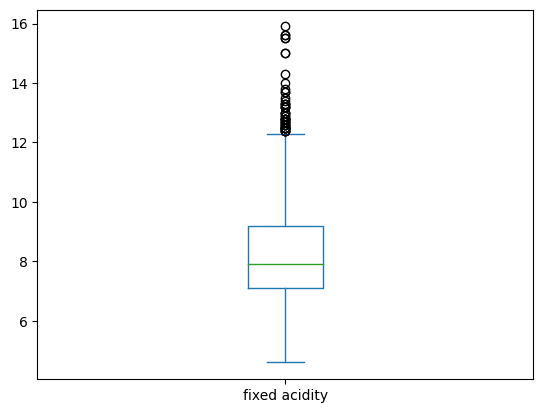

In [51]:
#Boxplot
df["fixed acidity"].plot(kind="box")

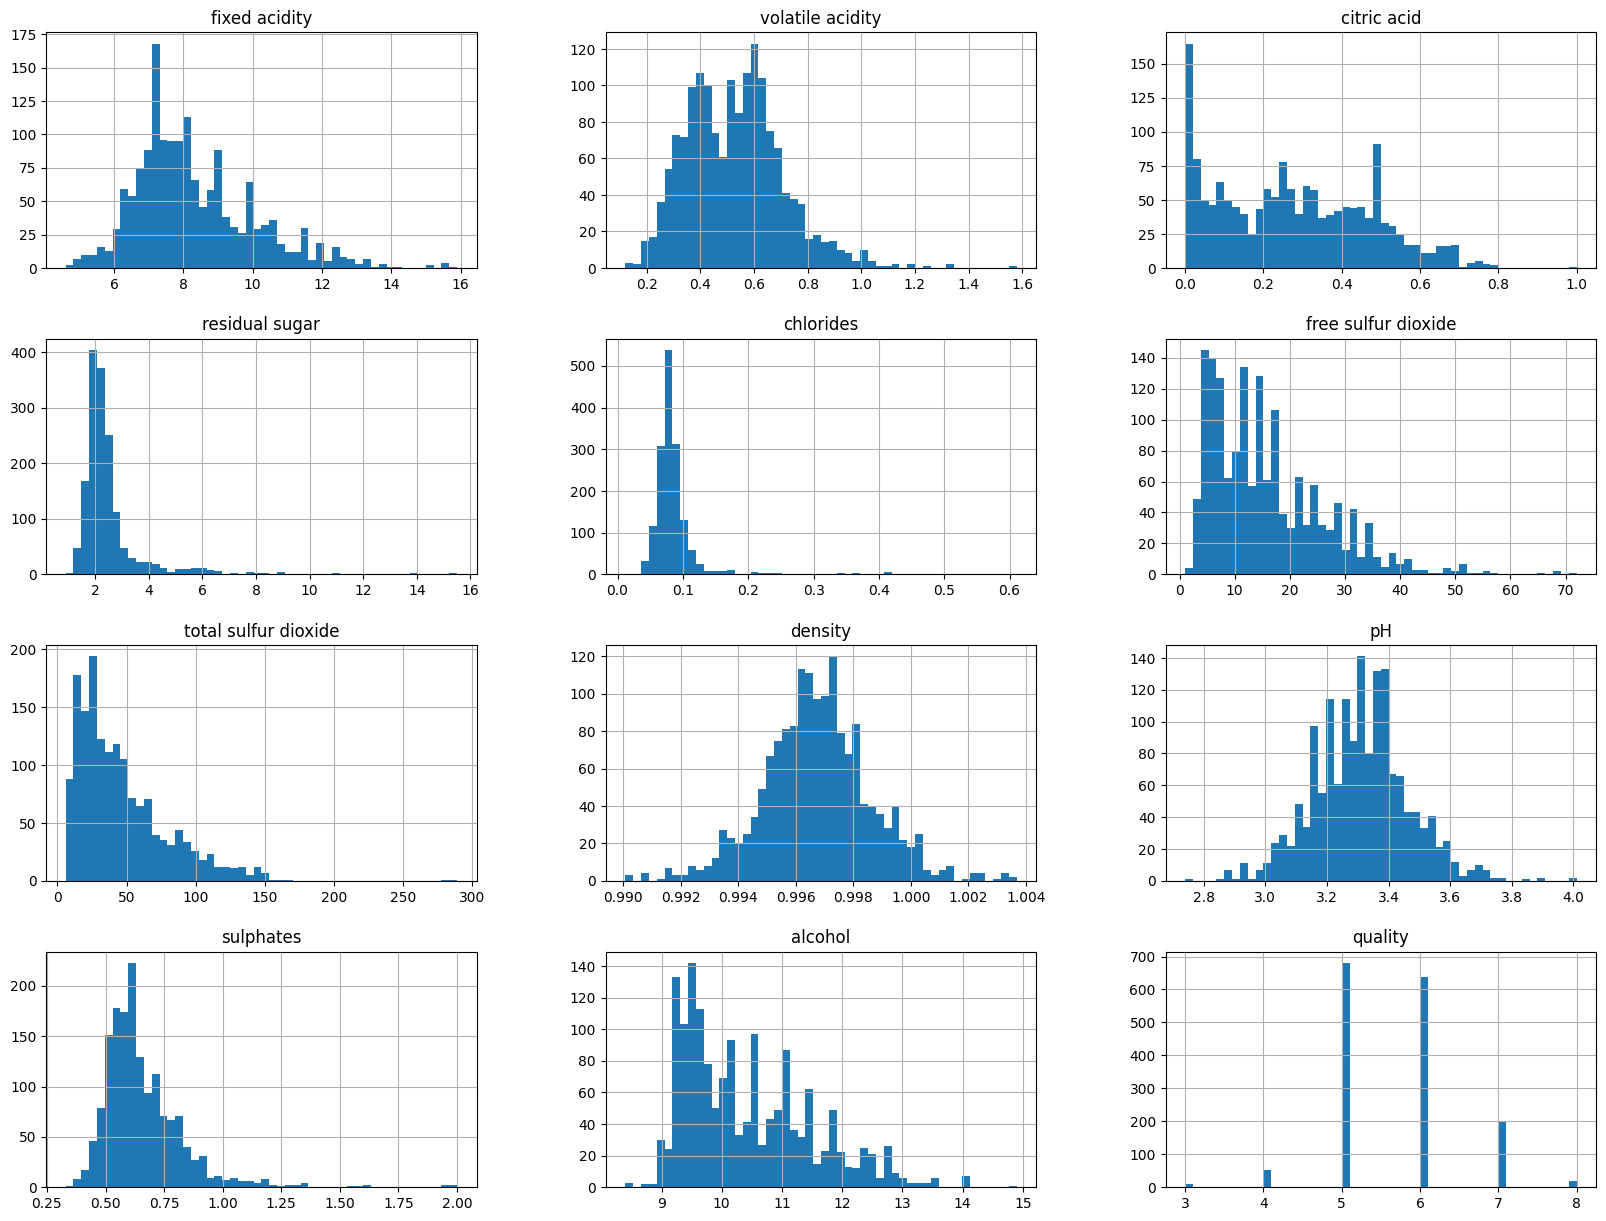

In [52]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [53]:
#Displaying How many times each unique values repeat in the quality column
print(df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [59]:
#If the quality is above 6 will be considered as good
df["newquality"]=[1 if i>=7 else 0 for i in df["quality"]]
print(df["newquality"].value_counts())
print(df.columns)


newquality
0    1382
1     217
Name: count, dtype: int64
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'newquality'],
      dtype='object')


In [60]:
#x contains all the independent variables
x=df.iloc[:,:-2]
#y contains dependent variable
y=df.iloc[:,-1]
# Splitting the data into Training and Testing part
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
mlp=MLPClassifier()
lg=LogisticRegression()
XGB=xgb.XGBClassifier()
models={"Random Forest":rfc,"Multi Layer Perceptron":mlp,"Gradient Boosting":gbc,"Logistic Regression":lg,"XGB":XGB}
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(name,":")
  print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)
  print("Classification Report :",classification_report(y_test,y_pred))
  print("Confusion Matrix :",confusion_matrix(y_test,y_pred))


Random Forest :
Accuracy Score : 90.0
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

Confusion Matrix : [[264   9]
 [ 23  24]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi Layer Perceptron :
Accuracy Score : 88.125
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.98      0.93       273
           1       0.71      0.32      0.44        47

    accuracy                           0.88       320
   macro avg       0.80      0.65      0.69       320
weighted avg       0.87      0.88      0.86       320

Confusion Matrix : [[267   6]
 [ 32  15]]
Gradient Boosting :
Accuracy Score : 88.125
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.64      0.45      0.52        47

    accuracy                           0.88       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.87      0.88      0.87       320

Confusion Matrix : [[261  12]
 [ 26  21]]
Logistic Regression :
Accuracy Score : 86.5625
Classification Report :               precision    recall  f1-score   supp

In [61]:
#Using XGB Model for predicting new datapoint as it is having high accuracy
new_df=pd.DataFrame({"fixed acidity":[10],"volatile acidity":[1],"citric acid":[2],"residual sugar":[5],
                     "chlorides":[0.5],"free sulfur dioxide":[60],"total sulfur dioxide":[250],"density":[1],
                     "pH":[3],"sulphates":[1],"alcohol":[10]})
y_pred1=XGB.predict(new_df)
print("Prediction for new datapoint :",y_pred1)

Prediction for new datapoint : [0]
